Files loaded successfully for bar chart generation.
Bar chart saved as 'top_10_population_barchart.png'


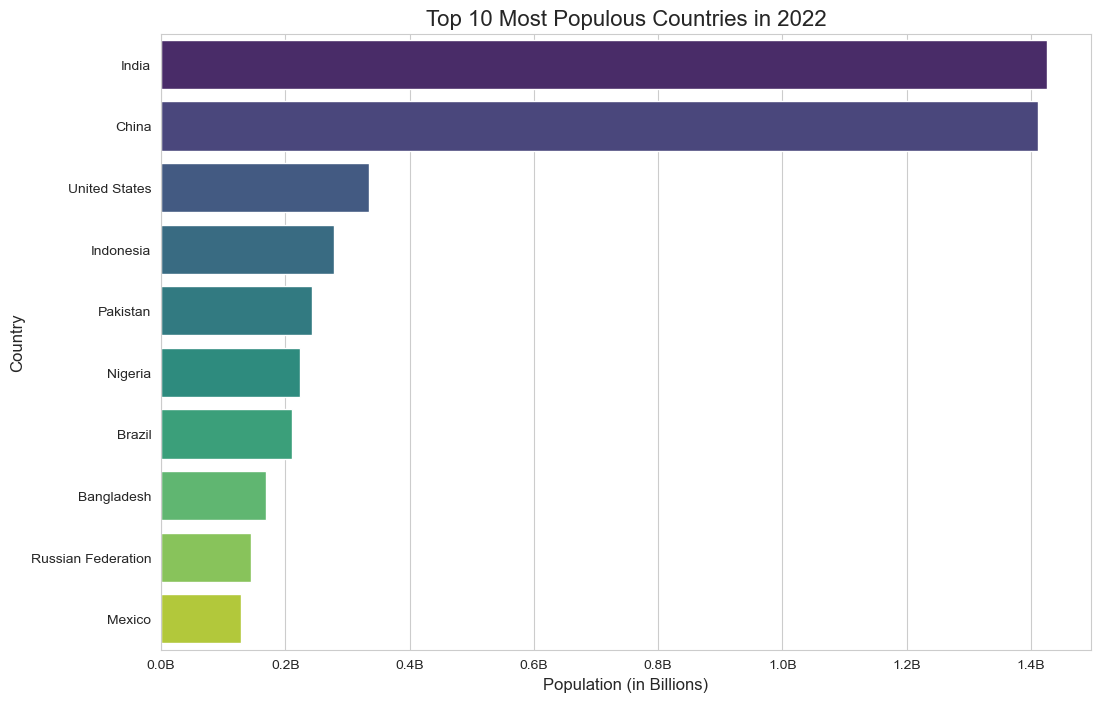

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.ticker import FuncFormatter

warnings.filterwarnings('ignore')

try:
    population_df = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv', skiprows=4)
    country_metadata_df = pd.read_csv('Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv')
    print("Files loaded successfully for bar chart generation.")
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
    print("Please make sure the CSV files are in the same directory as the script.")
    exit()

year_to_visualize = '2022'

if year_to_visualize not in population_df.columns:
    print(f"Error: Column '{year_to_visualize}' not found in the dataset.")
    exit()

population_2022_df = population_df[['Country Name', 'Country Code', year_to_visualize]].copy()
population_2022_df.rename(columns={year_to_visualize: 'Population'}, inplace=True)

population_2022_df.dropna(subset=['Population'], inplace=True)

valid_countries_df = country_metadata_df.dropna(subset=['Region'])
valid_country_codes = valid_countries_df['Country Code'].unique()
final_df = population_2022_df[population_2022_df['Country Code'].isin(valid_country_codes)]

final_df_sorted = final_df.sort_values(by='Population', ascending=False)

top_10_countries = final_df_sorted.head(10)

sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))

barplot = sns.barplot(
    x='Population',
    y='Country Name',
    data=top_10_countries,
    palette='viridis'
)

plt.title(f'Top 10 Most Populous Countries in {year_to_visualize}', fontsize=16)
plt.xlabel('Population (in Billions)', fontsize=12)
plt.ylabel('Country', fontsize=12)

def format_billions(x, pos):
    return f'{x / 1e9:.1f}B'

formatter = FuncFormatter(format_billions)
barplot.xaxis.set_major_formatter(formatter)

plt.savefig('top_10_population_barchart.png', dpi=300, bbox_inches='tight')
print("Bar chart saved as 'top_10_population_barchart.png'")


Files loaded successfully for histogram generation.
Histogram saved as 'population_distribution_histogram.png'


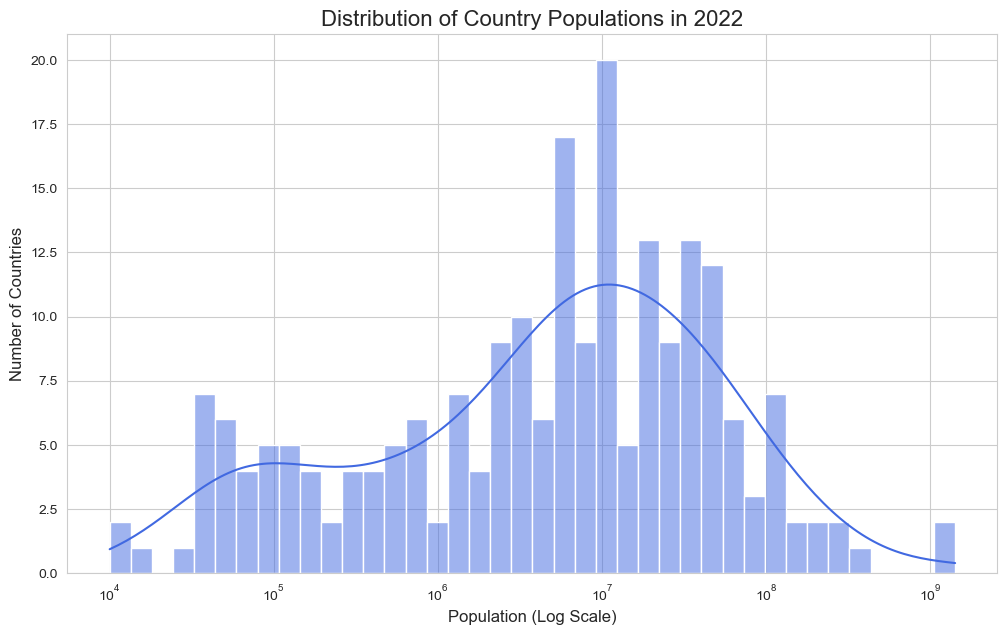

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

try:
    population_df = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv', skiprows=4)
    country_metadata_df = pd.read_csv('Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv')
    print("Files loaded successfully for histogram generation.")
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
    print("Please make sure the CSV files are in the same directory as the script.")
    exit()

year_to_visualize = '2022'

if year_to_visualize not in population_df.columns:
    print(f"Error: Column '{year_to_visualize}' not found in the dataset.")
    exit()

population_2022_df = population_df[['Country Name', 'Country Code', year_to_visualize]].copy()
population_2022_df.rename(columns={year_to_visualize: 'Population'}, inplace=True)

population_2022_df.dropna(subset=['Population'], inplace=True)

valid_countries_df = country_metadata_df.dropna(subset=['Region'])
valid_country_codes = valid_countries_df['Country Code'].unique()
final_df = population_2022_df[population_2022_df['Country Code'].isin(valid_country_codes)]

sns.set_style("whitegrid")

plt.figure(figsize=(12, 7))

sns.histplot(final_df['Population'], bins=40, kde=True, color='royalblue', log_scale=True)

plt.title(f'Distribution of Country Populations in {year_to_visualize}', fontsize=16)
plt.xlabel('Population (Log Scale)', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)

plt.savefig('population_distribution_histogram.png', dpi=300, bbox_inches='tight')
print("Histogram saved as 'population_distribution_histogram.png'")
